In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
colunas = ['AEROPORTO DE ORIGEM (SIGLA)', 'AEROPORTO DE ORIGEM (PAÍS)', 
           'AEROPORTO DE DESTINO (SIGLA)', 'AEROPORTO DE DESTINO (PAÍS)']

voo_2019 = pd.read_csv('resumo_anual_2019.csv', sep = ";", encoding="latin-1", usecols=colunas)
voo_2020 = pd.read_csv('resumo_anual_2020.csv', sep = ";", encoding="latin-1", usecols=colunas)

voo_2019 = voo_2019[voo_2019['AEROPORTO DE ORIGEM (PAÍS)'] == "BRASIL"]
voo_2019 = voo_2019[voo_2019['AEROPORTO DE ORIGEM (SIGLA)'] != voo_2019['AEROPORTO DE DESTINO (SIGLA)']]

voo_2020 = voo_2020[voo_2020['AEROPORTO DE ORIGEM (PAÍS)'] == "BRASIL"]
voo_2020 = voo_2020[voo_2020['AEROPORTO DE ORIGEM (SIGLA)'] != voo_2020['AEROPORTO DE DESTINO (SIGLA)']]

voo_2019['AEROPORTO DE DESTINO (SIGLA)'] = voo_2019[['AEROPORTO DE DESTINO (SIGLA)', 
                                          'AEROPORTO DE DESTINO (PAÍS)']].apply(lambda x: x[0] if x[1] == "BRASIL" else "INTER", 
                                                                                     result_type = "reduce", axis = 1)
voo_2020['AEROPORTO DE DESTINO (SIGLA)'] = voo_2020[['AEROPORTO DE DESTINO (SIGLA)', 
                                          'AEROPORTO DE DESTINO (PAÍS)']].apply(lambda x: x[0] if x[1] == "BRASIL" else "INTER", 
                                                                                     result_type = "reduce", axis = 1)
                                          
voo_2019.drop(columns = ['AEROPORTO DE ORIGEM (PAÍS)', 'AEROPORTO DE DESTINO (PAÍS)'], inplace = True)
voo_2020.drop(columns = ['AEROPORTO DE ORIGEM (PAÍS)', 'AEROPORTO DE DESTINO (PAÍS)'], inplace = True)

edge_df_2019 = voo_2019.groupby(voo_2019.columns.tolist(),as_index=False).size()
edge_df_2019.rename(columns = {'size' : 'weight'}, inplace = True)
edge_df_2020 = voo_2020.groupby(voo_2020.columns.tolist(),as_index=False).size()
edge_df_2020.rename(columns = {'size' : 'weight'}, inplace = True)

In [ ]:
edge_df_2019.head()

,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE DESTINO (SIGLA),weight
0,SBAE,SBGR,16
1,SBAE,SBKP,23
2,SBAE,SBML,11
3,SBAE,SBPS,4
4,SBAE,SBRP,1


In [ ]:
G19=nx.from_pandas_edgelist(edge_df_2019, 'AEROPORTO DE ORIGEM (SIGLA)', 'AEROPORTO DE DESTINO (SIGLA)', ['weight'])
G20=nx.from_pandas_edgelist(edge_df_2020, 'AEROPORTO DE ORIGEM (SIGLA)', 'AEROPORTO DE DESTINO (SIGLA)', ['weight'])

### De forma visual, existe alguma diferença significativa entre as rotas de voo realizadas em 2019 e 2020?

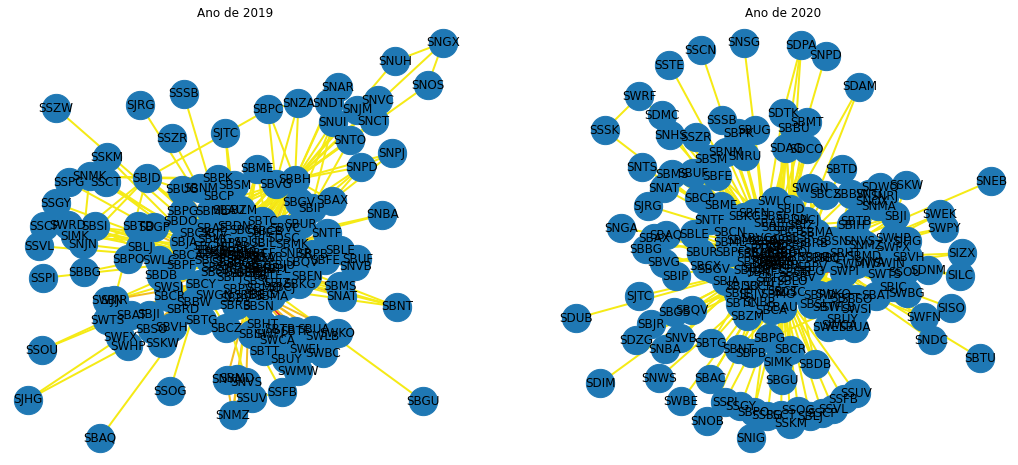

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))

def get_color(weight):
  if (weight < 10):
    return "#f5ea16" #amarelo
  elif (weight < 20):
    return "#f2be22" #laranja
  else:
    return "#f50a25" #vermelho

#2019
colors = [get_color(edge[2]['weight']) for edge in G19.edges(data=True)]
nx.draw(G19, with_labels=True, ax = ax[0], node_size=800, edge_color=colors, width = 2)
ax[0].set_title("Ano de 2019")

#2020
colors = [get_color(edge[2]['weight']) for edge in G20.edges(data=True)]
nx.draw(G20, with_labels=True, ax = ax[1], node_size=800, edge_color=colors, width = 2)
ax[1].set_title("Ano de 2020")

plt.show()

Vendo de forma geral é possível inferir que a rede de 2019 é mais densa (em termo do número de conexões) do que o ano de 2020. Isso pode ter ocorrido devido aos protocolos de restrição de voo para alguns lugares durante a pandemia. 

Também é possível perceber que a maioria das rotas realiza poucos voos (menos de 10) para ambos os anos, apesar do ano de 2019 mostrar em destaque algumas rotas com mais de 20 voos realizados. 

### Para ambos os anos existe alguma rota direta com um destino internacional partindo do aeroporto de São Gonçalo do Amarante (SBSG)? Senão, qual o tamanho da menor rota? E para o Aeroporto de Porto Alegre (SBPA)? 

In [ ]:
print("2019 SBSG-internacional: ", nx.shortest_path_length(G19, 'SBSG', 'INTER'))
print("2020 SBSG-internacional: ", nx.shortest_path_length(G20, 'SBSG', 'INTER'))
print("2019 SBSG-SBPA: ", nx.shortest_path_length(G19, 'SBSG', 'SBPA'))
print("2020 SBSG-SBPA: ", nx.shortest_path_length(G20, 'SBSG', 'SBPA'))

2019 SBSG-internacional:  1
2020 SBSG-internacional:  1
2019 SBSG-SBPA:  1
2020 SBSG-SBPA:  2


Existem rotas diretas de voo a partir do aeroporto de São Gonçalo do Amarante para algum destino internacional em ambos os anos. Já para o aeroporto de Porto Alegre, em 2019, existe uma rota direta. Enquanto que para 2020, não existe uma rota direta entre esses aeroportos e o menor caminho entre eles é a partir de um terceiro aeroporto. 

### Um aeroporto que é origem e destino de muitos rotas se relaciona mais com outros aeropotos do mesmo tipo? Essa caracteristica se manteve constante para 2020? 

In [ ]:
print("2019: ", nx.degree_assortativity_coefficient(G19))

2019:  -0.28350575614777895


Com base no valor negativo do coeficiente de assortatividade, é possível concluir que essa rede é disassortativa em relação ao grau. O que quer dizer que aeroportos que são destino/origem de muitas rotas, acabam se relacionam com aeroportos que são destino/origem de poucas rotas. 

In [ ]:
print("2020: ", nx.degree_assortativity_coefficient(G20))

-0.2537764346044519

Como valor do coeficiente de assortatividade se manteve quase o mesmo, é possível inferir que essa caracteristica se manteve a mesma para 2020, mesmo com menos rotas estabelecidas durante esse ano. 

### Partindo de qualquer aeroporto é possível chegar em qualquer outro aeroporto? 

In [ ]:
nx.is_connected(G19)

True

Como essa rede é conectada, existe então um caminho que liga quaisquer dois aeroportos, inclusive aqueles com destino/origem internacional. 